# Loading Phylogenies as ETE PhyloTree instances

Once all trees are computed, we want to start analyzing them. Let's first load them as Python objects. 


**TASK**: Read all trees and load them into a dictionary. Store the dictionary `all_trees` as a pickle file (`data/alltrees.pkl`) 

Tips:
- Use PhyloTree instances and provide a species name parser


In [2]:
# Read all trees and load them into a dictionary. Store the dictionary 'all_trees' as pickle file (data/alltrees.pkl) 
import pickle
import os
from ete3 import PhyloTree

def extract_spcode(nodename):
    return nodename.split('.')[0]

# Load all trees
all_trees = {}
for basename in open("data/target_families.txt"):
    basename = basename.strip()
    tree_file = 'data/phylo/%s/mafft_default-none-none-fasttree_default/%s.faa.final_tree.nw' %(basename, basename)
    if os.path.exists(tree_file):
        t = PhyloTree(tree_file, sp_naming_function=extract_spcode)
        all_trees[basename] = t
        
print("Trees loaded:", len(all_trees))

with open('data/alltrees.pkl', 'wb') as ALLTREES:
    pickle.dump(all_trees, ALLTREES)

Trees loaded: 2605


**Tip:** To load all trees back in other notebooks, you can now do it like this: 

In [3]:
import pickle
def extract_spcode(nodename):
    return nodename.split('.')[0]

all_trees = pickle.load(open('data/alltrees.pkl', 'rb'))
print("Trees loaded:", len(all_trees))


Trees loaded: 2605


### Let's try some Basic tree operations

We can quickly print it:

      /-525897.Dbac_2405
   /-|
  |   \-555778.Hneap_1768
--|
  |      /-637389.Acaty_c1916
  |   /-|
   \-|   \-637389.Acaty_c1239
     |
      \-1158165.KB898877_gene1259

Get the list of species and sequences included:
  Species in tree: {'637389', '525897', '555778', '1158165'}
  Seqs in tree: ['525897.Dbac_2405', '555778.Hneap_1768', '637389.Acaty_c1916', '637389.Acaty_c1239', '1158165.KB898877_gene1259']

Find nodes by name and read attributes:
           Name: 1158165.KB898877_gene1259
        Species: 1158165
  Branch length: 0.746139

Find internal nodes:

      /-637389.Acaty_c1916
   /-|
--|   \-637389.Acaty_c1239
  |
   \-1158165.KB898877_gene1259

Measure distances:
branch lenght dist: 0.746139
topology distance: 3.0

Or even render an image of any node:


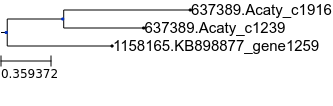

In [4]:
# Lest's grab the first list in the list
t = all_trees["555778.Hneap_1768"]

# Now let's explore basic operations: 

print("We can quickly print it:")
print(t)

print("\nGet the list of species and sequences included:")
print("  Species in tree:", t.get_species())
print("  Seqs in tree:", t.get_leaf_names())


print("\nFind nodes by name and read attributes:")
leaf_node = t & "1158165.KB898877_gene1259"
print("           Name:", leaf_node.name)
print("        Species:", leaf_node.species)
print("  Branch length:", leaf_node.dist)


print("\nFind internal nodes:")
internal_node = t.get_common_ancestor("1158165.KB898877_gene1259", "637389.Acaty_c1916")
print(internal_node)

print("\nMeasure distances:")
distance = t.get_distance(internal_node, leaf_node)
topo_distance = t.get_distance("525897.Dbac_2405", leaf_node, topology_only=True)
print("branch lenght dist:", distance)
print("topology distance:", topo_distance)

print("\nOr even render an image of any node:")
internal_node.render('%%inline')



### You can interact with the trees using a Graphical User Interface (GUI)



In [5]:
# Load a tree and view 
t = all_trees["555778.Hneap_1768"]
t.show()

(note that any modification done with the GUI, is kept in the tree instance when you close the GUI)


In [20]:
# print back after a mofication
print(t)


   /-637389.Acaty_c1916
--|
  |   /-637389.Acaty_c1239
   \-|
     |   /-1158165.KB898877_gene1259
      \-|
        |   /-525897.Dbac_2405
         \-|
            \-555778.Hneap_1768
